# Introduction to Python
by Nick Blauch and Matt Clapp

Python is one of the most popular general purpose programming languages, and it has also been developed to serve as a complete replacement for numerical computing languages like MATLAB. It is also excellent for neuroscience, cognitive psychology, statistics, and machine learning research with many of the best packages for these fields freely available and open-source. 

In this tutorial we will cover some of the basic principles of programming in Python, along with simple use cases for some of the most useful packages for scientific computing. However, **this is not a complete tutorial on Python and we can only scratch the surface here**. We encourage you to do a lot more research on your own time - hopefully this helps you navigate the waters a bit!

## General themes 

- Python is an object-oriented language
    - this means that "objects" - defined by their class methods and properties - are given a special status in Python. They are, according to the Python creator Guido van Rossum, "first class"
    - further, EVERYTHING is an object - even functions and types! 
    - the object-oriented paradigm has many advantages, allowing you to take advantage of concepts such as inheritance and encapsulation, which we will discuss later
    - further, working with certain packages (e.g. scikit-learn, pytorch) often requires you to define new object classes that inherit from base classes defined in the package
    - however, it is not *necessary* to write Python code in an object-oriented manner - for some applications, Matlab/R-style scripting with separate functions will be perfectly fine
- There are several ways to execute Python code. 
    - You can see the setup guide we developed for more information on that. 
    - For the UPNC we will be using JupyterLab and primarily Jupyter Notebooks. 
    - When it comes to writing code to do more intensive analyses, or for larger projects, we do not recommend Jupyter Notebooks. Rather, you should write Python files that can depend on each other, allowing you to cleanly organize your code.

## What Jupyter notebooks are and are not:

Jupyter notebooks are a great tool for:
- simple analyses
- prototyping new analyses
- visualizing your data
- developing interactive exercises and tutorials

Jupyter notebooks are not:
- a complete replacement for .py files
- easily tracked with version control (since their underlying representation is not simply human-readable text
- meant for intense analyses that need to maximally take advantage of parallel computation

Now that we know what Jupyter Notebooks are and are not, we can take advantage of their amazing functionality and ease-of-use for this tutorial. We will also be using them for many of the exercises to come in the uPNC.

## Variables and different built in object types

Let's start by covering the basic variable types, how to use them, and some simple operations that can be done on them.

In [1]:
# we can store values in variables
a = 12 # defaults to int
# we can do some math on those variables
b = a*12
print(type(b))
# in Python 3, division automatically converts to float
print(b/12)
print(type(b/12))

<class 'int'>
12.0
<class 'float'>


### Multi-element arrays: lists and tuples

In [2]:
# we can store multiple values in a list
my_list = [12, 14, a, b]
print(my_list)
# we can compose a list of lists
my_double_list = [my_list, my_list]
print(my_double_list)
my_list = [12, 14]
print(my_double_list)

[12, 14, 12, 144]
[[12, 14, 12, 144], [12, 14, 12, 144]]
[[12, 14, 12, 144], [12, 14, 12, 144]]


In [3]:
# indexing into lists - 
first_el = my_list[0] # Python is 0-based
last_el = my_list[-1] #the last element can be acquired with index -1
# we can use colon indexing to get multiple variables. 
first_two_els = my_list[0:2] # last index is given by last number - 1
print(first_el)
print(last_el)
print(first_two_els)

12
14
[12, 14]


In [4]:
# tuples are another form of multi-element array created with () notation
my_tuple = (12, 14.0) # like lists, they can store elements of different types

### Mutability

Mutability is an important concept and defines the difference between lists and tuples.

- Mutable objects can be changed after creation
    - built-in types: list, dict, set
- Immutable objects cannot be changed after creation
    - built-in types: int, float, complex, string, tuple, frozen set


In [5]:
# if we construct a list including int objects, changing value of the pointer to the int object won't affect the int in the list, which is immutable
a = 12
my_list = [12, 14, a]
a = 100
print(my_list)
# however the list itself can be modified
my_list[-1] = a
print(my_list)

[12, 14, 12]
[12, 14, 100]


In [6]:
# Python also has tuples, which are immutable. replace [] of lists with () for tuple
my_tuple = (12, 14, a)
print(my_tuple)
my_tuple[-1] = 12 # can't change elements of a tuple! 

(12, 14, 100)


TypeError: 'tuple' object does not support item assignment

### Dictionaries

Dictionaries are one of the most useful built-in types in Python. 

They are essentially look up tables of key:value pairs.

In new versions of Python, all dictionaries are ordered

In [92]:
# dictionaries can be created with curly bracket syntax or the built-in dict function
my_dict = {'best_language': 'Python', 'best_research_field': 'computational neuroscience'}
my_dict_2 = dict(best_language='Python', best_research_field='computational neuroscience')
# and we can index into values using square brackets indexed by the key
print(my_dict['best_research_field'])
print()

computational neuroscience



In [93]:
# we can loop over dictionary values
for val in my_dict:
    print(val)

best_language
best_research_field


In [94]:
# using .items() gives both the key and value for each iteration
for key, val in my_dict.items():
    print(f'{key}: val')

best_language: val
best_research_field: val


In [95]:
# remember we can use enumerate to get the index, too
for ii, (key, val) in enumerate(my_dict.items()):
    print(f'{ii}-th item is {key}: {val}')
    

0-th item is best_language: Python
1-th item is best_research_field: computational neuroscience


In [96]:
# dictionary comprehensions are also possible, similar to list comprehensions
inverse_dict = {val: key for key, val in my_dict.items()}
print(inverse_dict)

{'Python': 'best_language', 'computational neuroscience': 'best_research_field'}


## Basics of object-oriented programming

In object-oriented languages such as Python, everything is an object, which is defined by its class. Different classes have different properties and methods, and classes can properties and methods *inherit* from other classes

In [97]:
# everything is an object, defined by a class. what is 4?
a = 4
print(type(a))

<class 'int'>


In [98]:
# the methods and properties of a class can be accessed with the built-in dir function
print(dir(a))
print() # we can just call print to get an extra line

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']



In [99]:
# even dir is an object
print(type(dir))
print(dir(dir))
print()

<class 'builtin_function_or_method'>
['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__text_signature__']



In [100]:
# of course, lists are also objects
l = [12, 14, 16]
print(type(l))
print(dir(l))

<class 'list'>
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [101]:
# the help function can also be used, and is sometimes cleaner and more helpful ;) 
help(l)

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

In [102]:
# an object's methods are accessed using dot syntax
x = l.pop() # pops the last element in the list
print(x)
# note that general functions, such as dir, must exist in the namespace (either built-in, imported, or defined), and are called directly with objects as input
# sometimes, these functions look for a specific class method defined for the object, which is what dir does
print(dir(l) == sorted(l.__dir__()))

16
True


### Underscores in names
- in general, an object will have many methods or attributes with single or double underscores prepending and/or appending the name
    - e.g., `list.__len__`
- this syntax is sometimes purely convential, and sometimes functionally meaningful
    - this guide provides a helpful analysis of this syntax, which we will cover here (https://dbader.org/blog/meaning-of-underscores-in-python)
- `_var`:
    - hint to another programmer that a variable or method starting with a single underscore is intended for internal use
    - only functional role is that these methods will not be imported with the wildcard syntax (`from module import *`), which you should avoid anyway
- `var_`:
    - used if the relevant name is already taken, to avoid naming conflicts and allow laziness
- `__var`:
    - triggers "name mangling", which essentially allows a variable to be defined for a class and not overridden when a subclass is created
    - prevents direct access as `object.__var` , and is rather changed to, `object.__classname__var`
- `__var__`:
    - indicates special methods defined by the Python language
    - should be avoided for naming methods, except when implenting methods for which Python has defined a general purpose, such as `__init__` , `__call__`, or `__iter__` for your own classes
    - no name mangling
- `_` :
    - temporary or insignificant variable
    - gives the result of the last expression in a Python interpreter (including Jupyter Notebooks)

### Creating our first custom class

Using custom classes is an essential aspect of effective programming in Python.

Let's create a simple class that we can use to represent people. This class must have an `__init__` method, and any other methods that we think would be important. 

In [103]:
class Person(object): # (object) means that Person inherits from object, the most generic object type. all custom classes must inherit from something 
    """
    A Person object is defined by its name, age, occupation, and (favorite programming) language
    
    The __init__ function defines the input parameters. Our function takes 4 inputs:
    
    name (str): the name of the person
    age (int): the age of the person in years
    occupation (str): the occupation of the person
    language (str): the person's favorite programming language (default = 'Python')
    
    """
    def __init__(self, name: str, age: int, occupation: str, language: str = 'Python'):
        super().__init__()
        self.name = name
        self.age = age
        self.occupation = occupation
        self.language = language
    
    def get_name(self):
        # can you implement this?
        raise NotImplementedError()
        
    def get_age(self):
        # can you implement this?
        raise NotImplementedError()    
        
    def get_occupation(self):
        # can you implement this?
        raise NotImplementedError()
        
    def get_language(self):
        # can you implement this?
        raise NotImplementedError()
        
## question: is there any reason to implement the functions that we listed above? if so, what? 
 

### Inheritance

As mentioned earlier, all classes inherit from some other class. If we are defining a completely new class, the most basic class to inherit from is `Object`. However we can also inherit from more specific classes.

Let's create the `GradStudent` class to demonstrate inheritance from the `Person` class. Writing this class will be quick since it will inherit most of its functionality from the `Person` class. The one difference is that we will specify the occupation in terms of the field of study and year of study to automatically compute the occupation.

In [104]:
class GradStudent(Person):
    """
    A grad student is a Person with occupation graduate student. 
    We can also specify the field of study and years of experience to make a more specific grad student
    """
    def __init__(self, name: str, age: int, language: str = 'Python', field_of_study=None, years_of_experience=None):
        field = f'{field_of_study}' if field_of_study is not None else ''
        experience = f'Year {years_of_experience} ' if years_of_experience is not None else ''
        occupation = f'{experience}{field_of_study} graduate student'
        super().__init__(name, age, occupation, language)
        
nick = GradStudent('nick', 25, language='Python', field_of_study='neural computation', years_of_experience=2)
print(f'{nick.name} is a {nick.occupation}')

nick is a Year 2 neural computation graduate student


### Creating a simple function

We have already seen class-specific functions (i.e. methods). But functions can also be created independently of classes, and used to operate on arbitrary inputs. 

In [105]:
def multiply(l: list, a: int) -> list:
    """
    takes a list l and multiples it by an int or float a
    """
    x = [a*b for b in l]
    return x

multiply([2,3,4], 2)

[4, 6, 8]

### `*args` and `**kwargs`

You will often see `__init__` function calls include `*args` and/or ``**kwargs``. This allows additional unnamed arguments to be grouped into a tuple here called `args` (the name itself is arbitrary), and additional named arguments to be grouped into a dictionary here called `kwargs`.

Some uses of this:
- **Raw functionality**: writing a function which itself may depend on a variable number of inputs
- **Cleaner code**: writing a function which depends on other functions that accept a variable number of inputs


In [106]:
# Raw functionality - we can replace args with a more informative name here
def get_grad_student_names(*grad_students):
    names = []
    for grad_student in grad_students:
        names.append(grad_student.name)
    return names
print(get_grad_student_names(
    Person('Nick', 25, 'Neural computation graduate student', 'Python'),
    Person('Matt', 23, 'Neural computation graduate student', 'Python'),
                            )
     )

['Nick', 'Matt']


In [107]:
# more functionality AND cleaner code
class uPNCStudent(Person):
    """
    a uPNCStudent is a Person who is defined to be an undergraduate student.
    
    These students may also be allowed to have extra properties defined by the programmer
    
    """
    def __init__(self, name, age, language, **kwargs):
        super().__init__(name, age, 'undergraduate student', language)
        # this loop assigns all key, val pairs in kwargs directly to the uPNCStudent object
        for key, val in kwargs.items():
            setattr(self, key, val)

joe = uPNCStudent('Joe', 19, 'Java', favorite_ice_cream='mint chip')
print(joe.favorite_ice_cream)

mint chip


We can also use **unpacking** of a dictionary to specify the kwargs (or of a tuple to specify the args)

In [108]:
joe = uPNCStudent('Joe', 19, 'Java', **{'favorite_sport': 'baseball'})
print(joe.favorite_sport)

baseball


## String formatting

Formatting strings is crucial for effectively naming files or variables programmatically with variables

there are lots of ways to format strings. we will cover a few here. 

let's assume we have some variables that we want to use to print a message. perhaps you are looping through different people and want to know their occupation.

In [109]:
# let's create a few objects of type Person
nick = Person('Nick', 25, 'Neural computation graduate student', 'Python')
linda = Person('Linda', 50, 'Professor', 'Matlab')
matt = Person('Matt', 23, 'Neural computation graduate student', 'Python')

In [110]:
# f-strings (new and very convenient)
print(f"{nick.name}'s occupation is {nick.occupation}")

Nick's occupation is Neural computation graduate student


In [111]:
# .format() notation, somewhat similar to sprintf in matlab. compatible with older versions of Python
print("{}'s favorite programming language is {}".format(linda.name, linda.language))

Linda's favorite programming language is Matlab


In [112]:
# string addition
print("Nick thinks that " + matt.name + " is " + str(matt.age) + " years old")

Nick thinks that Matt is 23 years old


## For-loops and list comprehensions

Everybody probably knows about for loops. They are a great way to iterate through operations (but should be avoided when array operations are possible, to take advantage of multi-core processing, we will get to this). 

In [113]:
# in Python, we can specify a range of values using the range function
for ii in range(10):
    print(ii)

0
1
2
3
4
5
6
7
8
9


Remember that Python is 0-based. We can also specify a non-zero starting point of range. The end point is the 2nd argument to range, and is actually the final number minus 1, such that `range(10)` gives a 10-element range starting at 0. If we want to iterate through the range of even positive integers less than 10 what would we do? 

In [114]:
for ii in range(2,10,2):
    print(ii)

2
4
6
8


The `enumerate` function is a great Python trick for quickly getting indices of a for loop iteration. If we want to know what index we are at for each iteration of the last function, we can do the folllowing:

In [115]:
for ii, num in enumerate(range(2,10,2)):
    print(f'the number at index {ii} is {num}')

the number at index 0 is 2
the number at index 1 is 4
the number at index 2 is 6
the number at index 3 is 8


### List comprehensions
Only Python users are probably familiar with list comprehensions. 

They are a bit quirky at first but most grow to love them for their simplicity and brevity

In [116]:
# let's assume we have a list and want to iterate some operation over it
my_list = [1, 2, 3, 4]
my_doubled_list = [2*a for a in my_list] # yes, there are other ways to do this...to come
print(my_doubled_list)

[2, 4, 6, 8]


# Python for data science: 
The data science "stack" includes some key packages
- `Numpy` - numerical arrays and matrix computation
- `Pandas` - dataframes (similar to those in R)
- `Scipy` - scientific functions, including statistics 
- `Scikit-Learn` - machine learning powerhouse
- `Matplotlib` - powerful plotting library
- `Seaborn` - wrapper for Matplotlib that makes making beautiful and highly informative plots super easy 

This data science stack was partially developed to recapitulate the core functionalities available in Matlab and Matlab toolboxes, but as a free and open source alternative. However, in many cases what is available in Python also goes well beyond what is available in Matlab, and now Matlab is implementing things that have been developed first in Python.

## multidimensional arrays with numpy

In [117]:
# many packages have standard shorthand import names, such as np for numpy
import numpy as np

print(np.__version__)  # prints the version of a package

1.15.1


In [118]:
# creating 1D arrays
mylist = [1, 1, 2, 3, 5, 8]  # regular python list
array = np.array(mylist)  # a numpy array can be created by passing a python list into np.array(...)
print(array)  
print(type(array))  # the array might look similar a list but it is actually a very different type of object

[1 1 2 3 5 8]
<class 'numpy.ndarray'>


In [119]:
# arrays of can be created with any number of dimensions, as long as it's "rectangular"
array = np.array([[1, 2], [3, 4], [5, 6]]) # 2d array
print(array)

[[1 2]
 [3 4]
 [5 6]]


In [120]:
array = np.array([[1, 2], [3], [5, 6]]) # not rectangular
print(array) # result is a 1d array of lists

[list([1, 2]) list([3]) list([5, 6])]


In [121]:
array = np.array(102) # a "0D" array
print(array)

102


In [122]:
# 3d array
array3d = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], [[10, 20, 0, 0], [30, 40, 0, 0], [50, 60, 0, 0]]])
print(array3d)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[10 20  0  0]
  [30 40  0  0]
  [50 60  0  0]]]


In [123]:
# finding attributes of numpy arrays

print(array3d.ndim)  # number of dimensions
print(array3d.shape) # shape, listed from outermost to innermost dimension
print(array3d.size) # total number of elements
print(len(array3d)) # the length of the first dimension

3
(2, 3, 4)
24
2


In [124]:
# mixed datatypes are allowed by default
array = np.array([['a','b','c'],[1,2,3],[{},str,len]])
print(array)
# this is bad practice though

[['a' 'b' 'c']
 [1 2 3]
 [{} <class 'str'> <built-in function len>]]


In [125]:
# data type can be specified for the array... there's a big selection
array = np.array([1,2,3,700,0.07], dtype='int8')
print(array)
array = np.array([1,2,3], dtype='float64')
print(array)
array = np.array([1,2,3], dtype='complex')
print(array)
array = np.array(['a',7,len], dtype='str')
print(array)

[  1   2   3 -68   0]
[1. 2. 3.]
[1.+0.j 2.+0.j 3.+0.j]
['a' '7' '<built-in function len>']


In [126]:
# arrays can be reshaped

array1 = np.arange(12) # create a 1D array of numbers 0-11 inclusive
array2 = array1.reshape((3,4))
array3 = array2.reshape((3,2,2))
array4 = array3.reshape((4,3))

print(array1)
print(array2)
print(array3)
print(array4)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [127]:
# indexing into an array is pretty convenient
array = np.zeros((100,100)) # 100x100 array of zeros

# indexing
array[1,2] = 10 # set the 2nd row, 3rd column element to 10
array[-1,-2] = 11 # set the last row, 2nd-to-last column element to 11

# slicing
array[0, :] = 1 # set all elements in the first row to 1
array[2, :] = 1 # set all elements in the 3rd row to 1

print(array)

[[ 1.  1.  1. ...  1.  1.  1.]
 [ 0.  0. 10. ...  0.  0.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0. 11.  0.]]


In [128]:
# we can do simple things like compute sums, means and standard deviations of rows, columns, or the whole array
mean_rows = np.mean(array, 1) # take the mean over the 2nd dimension (columns) to give the mean for each row
sum_cols = np.sum(array, 0) # sum over the 1st dimension (rows) to give sums of each column
std_array = np.std(array) # if no axis is specified, the array is flattened and then the mean/sum/std is taken 
print(mean_rows)
print(sum_cols)
print(std_array)

[1.   0.1  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.11]
[ 2.  2. 12.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2. 13.  2.]
0.20398919089010573


In [129]:
print(array3d)
print(np.sum(array3d, (0,1)))  # you can mean/sum/std over multiple dimensions at once

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[10 20  0  0]
  [30 40  0  0]
  [50 60  0  0]]]
[105 138  21  24]


In [130]:
# other cool slicing
print(np.arange(50)[10:30:3])  # start:end:step

[10 13 16 19 22 25 28]


In [131]:
a1 = np.array([1, 2, 3, 4])
a2 = np.array([6, 7, 8, 9])

# arrays can be concatenated together
a3 = np.concatenate((a1, a2))
# they can also be "stacked" along a new dimension
a4 = np.stack((a1, a2))
print(a3)
print(a4)

[1 2 3 4 6 7 8 9]
[[1 2 3 4]
 [6 7 8 9]]


In [132]:
# there's plenty of ways to stack arrays
# in general... if you have two arrays and can imagine a way to combine them, 
# there probably exists a function capable of doing just that (with the right arguments)
# Here's some helper functions
a5 = np.hstack((a1, a2))
a6 = np.vstack((a1, a2))
a7 = np.dstack((a1, a2))
print(a5)
print(a6)
print(a7)

[1 2 3 4 6 7 8 9]
[[1 2 3 4]
 [6 7 8 9]]
[[[1 6]
  [2 7]
  [3 8]
  [4 9]]]


In [133]:
array = np.arange(10)
print(array)
print(np.array_split(array, 3)) # a list of 3 arrays, created by splitting the given array into 3 parts

[0 1 2 3 4 5 6 7 8 9]
[array([0, 1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]


In [134]:
print(array3d)
results = np.array_split(array3d, 3, axis=1)  # split a 3D array along its 2nd axis
for result in results:
    print(result)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[10 20  0  0]
  [30 40  0  0]
  [50 60  0  0]]]
[[[ 1  2  3  4]]

 [[10 20  0  0]]]
[[[ 5  6  7  8]]

 [[30 40  0  0]]]
[[[ 9 10 11 12]]

 [[50 60  0  0]]]


In [135]:
# shuffling, searching, filtering, sorting

array = np.arange(20)
print(array)

# in-place shuffling (in-place means array is modified directly)
np.random.shuffle(array)
print(array)

# find positions where a conditional statment is satisfied
indices = np.where(array*array + array > 100)
print(indices)

# index into the array at those positions to filter
print(array[indices])

# sort the array
array = np.sort(array)
print(array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[11  0 16  5 18 19 13  3 12  9  1 17 10 14  4  7 15  2  6  8]
(array([ 0,  2,  4,  5,  6,  8, 11, 12, 13, 16]),)
[11 16 18 19 13 12 17 10 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [136]:
array = np.array([[1, 2], [3, 4], [5, 6]]) # 2d array
print(array)
indices = np.where(array >= 4)
print(indices)

[[1 2]
 [3 4]
 [5 6]]
(array([1, 2, 2]), array([1, 0, 1]))


In [137]:
# matrix operations

array1 = np.array([[1, 2], [3, 4], [5, 6]]) # 2d array
print(array1)

array2 = np.array([[7, 8], [9, 0]]) # another 2d array
print(array2)

# three ways of computing matrix product
matrixproduct = array1 @ array2
matrixproduct = array1.dot(array2)
matrixproduct = np.matmul(array1,array2)
print(matrixproduct)

[[1 2]
 [3 4]
 [5 6]]
[[7 8]
 [9 0]]
[[25  8]
 [57 24]
 [89 40]]


In [138]:
array2 = np.array([[7, 8], [9, 0]]) # another 2d array
print(array2)

inverse = np.linalg.inv(array2)
print(inverse)

trans = array2.transpose()
print(trans)

# ways of computing a scalar product
scalarproduct = array2 * 10
scalarproduct = array2.dot(10)
print(scalarproduct)

[[7 8]
 [9 0]]
[[ 0.          0.11111111]
 [ 0.125      -0.09722222]]
[[7 9]
 [8 0]]
[[70 80]
 [90  0]]


In [139]:
vector1 = np.array([1,2,3])
print(vector1)
vector2 = np.array([1,10,100])
print(vector2)

# element-wise operations
elementsum = vector1 + vector2
print(elementsum)
elementproduct = vector1 / vector2
print(elementproduct)

# .dot() also computes inner product
innerproduct = vector1.dot(vector2)
print(innerproduct)

# other vector operations also supported
innerproduct = np.cross(vector1,vector2)
print(innerproduct)

[1 2 3]
[  1  10 100]
[  2  12 103]
[1.   0.2  0.03]
321
[170 -97   8]


In [140]:
# numpy has a large assortment of functions for generating random data

array = np.random.standard_normal(25)
print(array)

# creating an array with a given shape filled with values between 0 and 1
array = np.random.rand(2,4)
print(array)

[ 0.72327965  0.06926786 -0.5053938   0.85687604 -0.71775493 -1.50883144
 -1.21707161  0.53782412 -0.27798733  0.75728679 -0.1658114  -0.75248736
 -0.50651854 -1.46569974 -0.90482505 -0.38450146  0.06388031 -1.32430606
 -0.12728403 -0.02810934 -0.16009464  0.09679081  0.83643277  2.13996189
  1.56475913]
[[0.46128891 0.2517915  0.22518448 0.46758265]
 [0.56805173 0.74121159 0.50173302 0.50446049]]


## organizing your data with pandas dataframes

In [141]:
import pandas as pd
# pd is the standard abbreviation for pandas

# pandas dataframes are similar to 2D arrays, but are more in the style of a database
# rows represent IDs / entries / labels / observations
# colums represent properties / measured variables

array = np.array([['a','x',23],['b','y',45],['c','z',67]])
df = pd.DataFrame(array,columns=['firstname','lastname','value'])
df

,firstname,lastname,value
0,a,x,23
1,b,y,45
2,c,z,67


In [142]:
# copies can be made which are unaffected by modifications to the original
dfcopy = df.copy()

# convert the 'firstname' column into the row label, replacing the default labels
df.set_index('firstname', inplace=True)
df

,lastname,value
firstname,,
a,x,23
b,y,45
c,z,67


In [143]:
# ways to index a dataframe
df.loc['a']  # get row based on label

lastname     x
value       23
Name: a, dtype: object

In [144]:
df.loc['a','lastname']  # get element based on row and column label

'x'

In [145]:
df.iloc[0]  # get row based on label

lastname     x
value       23
Name: a, dtype: object

In [146]:
df.iloc[0,0]  # get element based on label and column index

'x'

In [147]:
# can get a section of the dataframe by specifying multiple rows and columns
# notice the reordering of data
df.loc[('c','a'),('value','lastname')]

,value,lastname
firstname,,
c,67,z
a,23,x


In [148]:
# getting a single column
df.loc[:,'value']

firstname
a    23
b    45
c    67
Name: value, dtype: object

In [149]:
# you can index columns with []
df['value']

firstname
a    23
b    45
c    67
Name: value, dtype: object

In [150]:
# you can also index rows with [] if you have a boolean list indicating rows to include
df[[True,False,True]]

,lastname,value
firstname,,
a,x,23
c,z,67


In [151]:
# while a pandas DataFrame is a 2D structure, a pandas Series is a 1D structure, representing a column or row
type(df.loc['a'])

pandas.core.series.Series

In [152]:
# there are different ways of declaring a Series

# from a list or array
series = pd.Series(['a','b','c','d','e'])
print(series)
print()

# similar to rows/columns, the different positions can have different labels
series = pd.Series(['a','b','c','d','e'],index=['col1','col2','col3','col4','col5'])
print(series)
print()

# a python dictionary can also be converted to a series
series = pd.Series({'col1':'val1','col2':'val2'})
print(series)

0    a
1    b
2    c
3    d
4    e
dtype: object

col1    a
col2    b
col3    c
col4    d
col5    e
dtype: object

col1    val1
col2    val2
dtype: object


In [153]:
# rows and columns of the dataframe can be added or edited

series = df.loc['a']
print(series)
df.loc['d'] = series
df

lastname     x
value       23
Name: a, dtype: object


,lastname,value
firstname,,
a,x,23
b,y,45
c,z,67
d,x,23


In [154]:
df.loc[:,'value'] = [3,5,7,9]
df

,lastname,value
firstname,,
a,x,3
b,y,5
c,z,7
d,x,9


In [155]:
# another way to declare dataframes
df1 = pd.DataFrame({'col1':[1,2,3,4],'col2':[5,6,7,8],'col3':[0,0,0,0]})
df1

,col1,col2,col3
0,1,5,0
1,2,6,0
2,3,7,0
3,4,8,0


In [156]:
# make a second dataframe with some overlap in column names

df2 = pd.DataFrame({'col1':[10,20],'col2':[30,40],'col4':[60,70]})
print(df2)

# append one to the other (original dataframes are unmodified)
result = df1.append(df2)
print(result)

# concatenate a list of dataframes together
result = pd.concat([df1,df2])
print(result)

   col1  col2  col4
0    10    30    60
1    20    40    70
   col1  col2  col3  col4
0     1     5   0.0   NaN
1     2     6   0.0   NaN
2     3     7   0.0   NaN
3     4     8   0.0   NaN
0    10    30   NaN  60.0
1    20    40   NaN  70.0
   col1  col2  col3  col4
0     1     5   0.0   NaN
1     2     6   0.0   NaN
2     3     7   0.0   NaN
3     4     8   0.0   NaN
0    10    30   NaN  60.0
1    20    40   NaN  70.0


/Users/nickblauch/anaconda/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
/Users/nickblauch/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [157]:
rowtoappend = pd.Series([11,22,33,44], index=result.columns)
df = result.append(rowtoappend, ignore_index=True)  #ignore_index resets/recomputes the default indices
df

,col1,col2,col3,col4
0,1,5,0.0,NaN
1,2,6,0.0,NaN
2,3,7,0.0,NaN
3,4,8,0.0,NaN
4,10,30,NaN,60.0
5,20,40,NaN,70.0
6,11,22,33.0,44.0


In [158]:
# calculating basic statistics on dataframes

print(df.mean())
print(df.std())
print(df.cumsum())

col1     7.285714
col2    16.857143
col3     6.600000
col4    58.000000
dtype: float64
col1     6.824326
col2    13.957418
col3    14.758049
col4    13.114877
dtype: float64
   col1   col2  col3   col4
0   1.0    5.0   0.0    NaN
1   3.0   11.0   0.0    NaN
2   6.0   18.0   0.0    NaN
3  10.0   26.0   0.0    NaN
4  20.0   56.0   NaN   60.0
5  40.0   96.0   NaN  130.0
6  51.0  118.0  33.0  174.0


In [159]:
# ways to test for NaN values
print(df.isna())
print(df.notna())

    col1   col2   col3   col4
0  False  False  False   True
1  False  False  False   True
2  False  False  False   True
3  False  False  False   True
4  False  False   True  False
5  False  False   True  False
6  False  False  False  False
   col1  col2   col3   col4
0  True  True   True  False
1  True  True   True  False
2  True  True   True  False
3  True  True   True  False
4  True  True  False   True
5  True  True  False   True
6  True  True   True   True


In [160]:
# testing columns/rows produces a series of boolean values
print(df['col3']<10)
print(df['col3'].notna())

0     True
1     True
2     True
3     True
4    False
5    False
6    False
Name: col3, dtype: bool
0     True
1     True
2     True
3     True
4    False
5    False
6     True
Name: col3, dtype: bool


In [161]:
# you can use this to filter
filtered = df[df['col3'].notna()]
filtered

,col1,col2,col3,col4
0,1,5,0.0,NaN
1,2,6,0.0,NaN
2,3,7,0.0,NaN
3,4,8,0.0,NaN
6,11,22,33.0,44.0


In [60]:
df = df.fillna(0) # lots of arguments can be provided for different methods of filling missing data
df

,col1,col2,col3,col4
0,1,5,0.0,0.0
1,2,6,0.0,0.0
2,3,7,0.0,0.0
3,4,8,0.0,0.0
4,10,30,0.0,60.0
5,20,40,0.0,70.0
6,11,22,33.0,44.0


In [61]:
# you can sort by value of a column
df = df.sort_values(by=['col2'])
df

,col1,col2,col3,col4
0,1,5,0.0,0.0
1,2,6,0.0,0.0
2,3,7,0.0,0.0
3,4,8,0.0,0.0
6,11,22,33.0,44.0
4,10,30,0.0,60.0
5,20,40,0.0,70.0


In [62]:
# it's easy to do math on columns
df['col5'] = df['col4'] + df['col2']*df['col1']
df

,col1,col2,col3,col4,col5
0,1,5,0.0,0.0,5.0
1,2,6,0.0,0.0,12.0
2,3,7,0.0,0.0,21.0
3,4,8,0.0,0.0,32.0
6,11,22,33.0,44.0,286.0
4,10,30,0.0,60.0,360.0
5,20,40,0.0,70.0,870.0


In [63]:
# there's plenty of math functions available, such as covariance
df.cov()

,col1,col2,col3,col4,col5
col1,46.571429,92.047619,20.428571,202.714286,2135.142857
col2,92.047619,194.809524,28.285714,439.142857,4276.095238
col3,20.428571,28.285714,155.571429,105.285714,326.857143
col4,202.714286,439.142857,105.285714,1018.476190,9276.761905
col5,2135.142857,4276.095238,326.857143,9276.761905,101764.619048


In [64]:
# extra note: check out read_csv and to_csv to importing/exporting data frames

## plotting with matplotlib and seaborn

In [65]:
import matplotlib.pyplot as plt

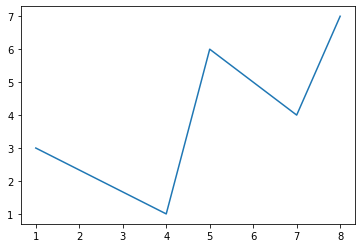

In [66]:
# there's two main ways to use matplotlib
# the first is a more "command line"-style interface using plt

plt.plot([1,4,5,7,8],[3,1,6,4,7]) # x and y lists/arrays/series.  Example: columns of a dataframe
plt.show() # jupyter notebooks show plots automatically at the end of a code cell

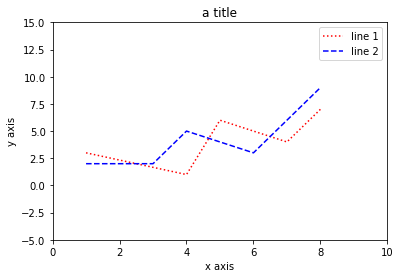

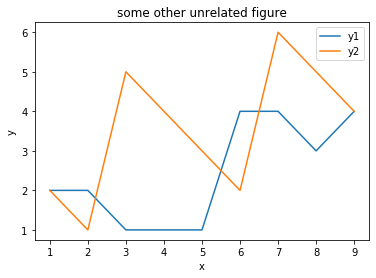

In [67]:
# single panel plots can be designed step-by-step with various function calls using plt

plt.plot([1,4,5,7,8],[3,1,6,4,7],color='red',linestyle='dotted')  # shorthand exists... 'red'->'r' 'dotted'->':'
plt.plot([1,3,4,6,8],[2,2,5,3,9],color='blue',linestyle='dashed')
plt.xlim(0,10)
plt.ylim(-5,15)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.title('a title')
plt.legend(['line 1','line 2'])
plt.show()


plt.clf()  # clear figure
df = pd.DataFrame({'x':[1,2,3,4,5,6,7,8,9],'y1':[2,2,1,1,1,4,4,3,4],'y2':[2,1,5,4,3,2,6,5,4]})
plt.plot(df['x'],df['y1'])
plt.plot(df['x'],df['y2'])
plt.legend(['y1','y2'])
plt.ylabel('y')
plt.xlabel('x')
plt.title('some other unrelated figure')
plt.show()

(0, 1)

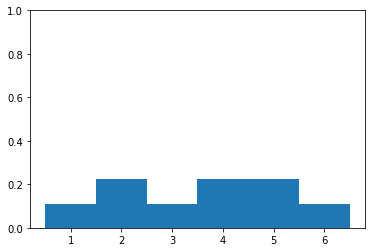

In [68]:
# plotting a histogram
plt.hist(df['y2'], bins=6, range=(1,7), density=True, align='left')
# the additional arguments can help make the histogram look nice
plt.ylim(0,1)

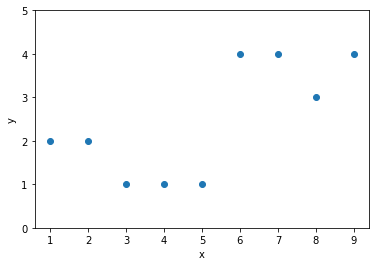

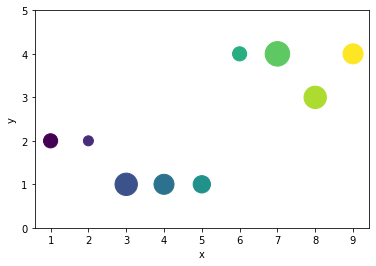

In [69]:
# plotting a scatterplot
plt.scatter(df['x'], df['y1']) # basic scatterplot
plt.ylim(0,5)
plt.ylabel('y')
plt.xlabel('x')
plt.show()


plt.clf()
plt.ylim(0,5)
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(df['x'], df['y1'], s=df['y2']*100, c=df['x']) # scatterplot with sizes and colors defined

In [70]:
# defining error (arbitrarily)
df['err'] = [0.1,0.2,0.1,0.3,0.2,0.1,0.3,0.3,0.1]
df

,x,y1,y2,err
0,1,2,2,0.1
1,2,2,1,0.2
2,3,1,5,0.1
3,4,1,4,0.3
4,5,1,3,0.2
5,6,4,2,0.1
6,7,4,6,0.3
7,8,3,5,0.3
8,9,4,4,0.1


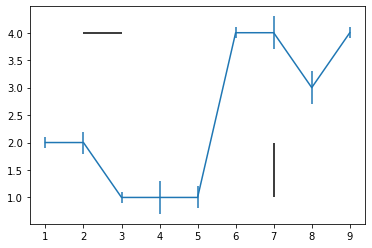

In [71]:
# error bar plot
plt.errorbar(df['x'],df['y1'],yerr=df['err'],xerr=None)

# drawing arbitrary lines on the plot
plt.hlines(4,2,3) # horizonal
plt.vlines(7,1,2) # vertical

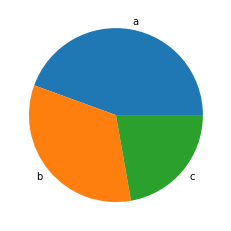

In [72]:
# pie chart
plt.pie([4,3,2],labels=['a','b','c'])
plt.show()

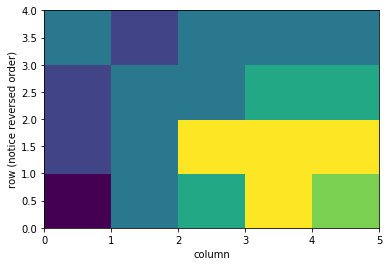

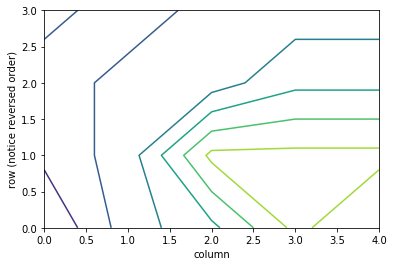

In [73]:
# basic heatmap
array = np.array([[0,2,3,5,4],[1,2,5,5,5],[1,2,2,3,3],[2,1,2,2,2]])
plt.pcolormesh(array)
plt.ylabel('row (notice reversed order)')
plt.xlabel('column')
plt.show()
plt.clf()

plt.contour(array)
plt.ylabel('row (notice reversed order)')
plt.xlabel('column')
plt.show()

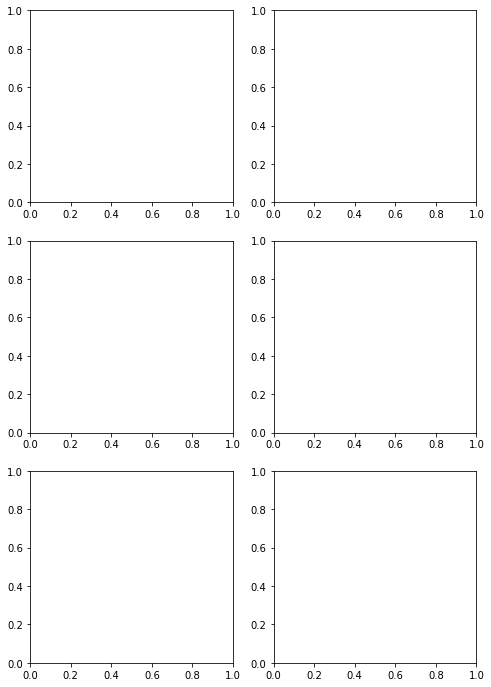

In [74]:
# second way to use matplotlib: create a figure with subplots, which returns a list of "axes" objects
# manipulate these objects in a similar way as above

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize=(8,12)) # width, height

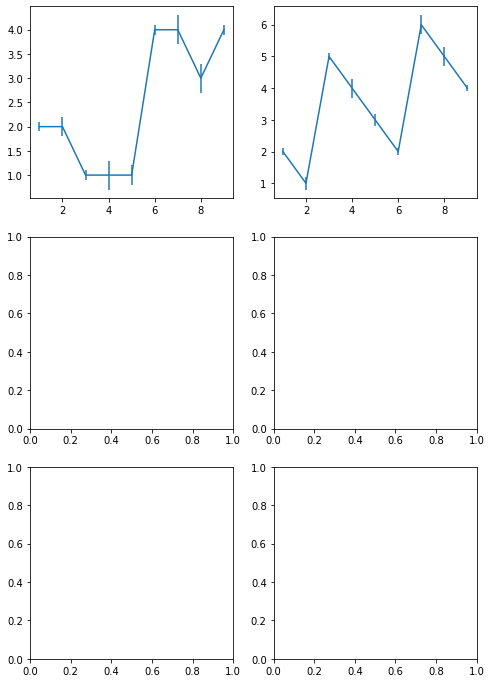

In [75]:
ax1.errorbar(df['x'],df['y1'],yerr=df['err'])
ax2.errorbar(df['x'],df['y2'],yerr=df['err'])
fig

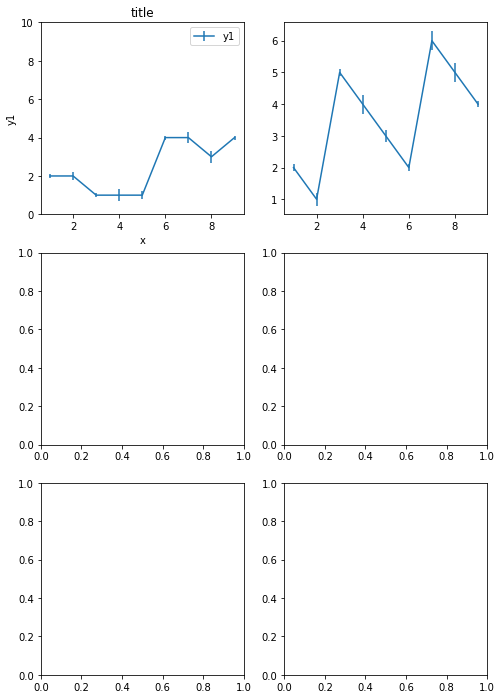

In [76]:
ax1.set_ylim(0,10)
ax1.set_ylabel('y1')
ax1.set_xlabel('x')
ax1.set_title('title')
ax1.legend(['y1'])
fig

In [77]:
# saving a figure
# fig.savefig('myimage.png')

In [78]:
# seaborn : nice graphs with some automatic data processing

import seaborn as sns

In [79]:
# there's different styles for figures, this is one of the built-in styles
sns.set_style("white")

In [80]:
# generate some data for linear regression
xs = np.random.standard_normal(25)
ys = np.random.standard_normal(25) + xs
df = pd.DataFrame({'x':xs,'y':ys})
df

,x,y
0,1.123886,2.034254
1,0.550629,0.302724
2,1.073835,-0.261576
3,-0.526753,-0.162158
4,-0.655337,-0.541123
5,1.648068,0.847754
6,-0.404567,-0.342779
7,1.340326,2.526946
8,-0.870971,-1.495454
9,-1.583199,-0.250674


/Users/nickblauch/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


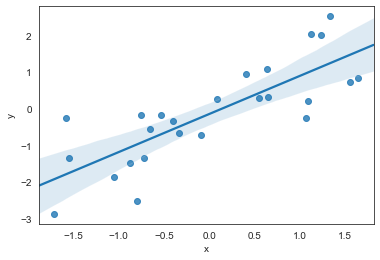

In [81]:
# linear regression plot
sns.regplot(df['x'], df['y'])
# shows a scatterplot, the regression line, and also confidence intervals

/Users/nickblauch/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nickblauch/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nickblauch/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tupl

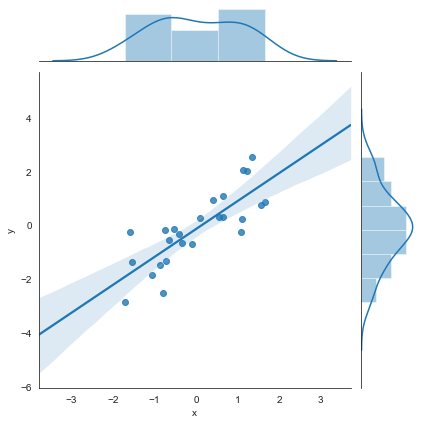

In [82]:
# joint plot adds cool-looking histograms
sns.jointplot(df['x'], df['y'], kind="reg")

In [83]:
# generate data for line plot
xs = np.repeat(np.arange(10)/3,20)
ys = np.sin(xs) + np.random.rand(len(xs))
df = pd.DataFrame({'inputs':xs,'observations':ys})
df

,inputs,observations
0,0.000000,0.699419
1,0.000000,0.213726
2,0.000000,0.986283
3,0.000000,0.712970
4,0.000000,0.295952
5,0.000000,0.560998
6,0.000000,0.321673
7,0.000000,0.380603
8,0.000000,0.571308
9,0.000000,0.259300


(0, 2)

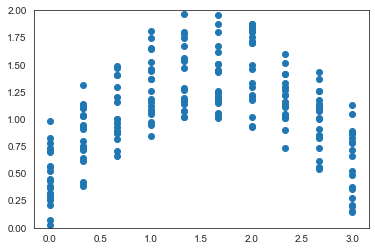

In [84]:
# first, plotting a regular scatterplot to show the amount of noise in data
plt.scatter(df['inputs'],df['observations'])
plt.ylim(0,2)

/Users/nickblauch/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 2)

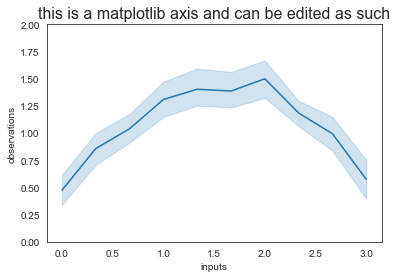

In [85]:
# for line plots, data sets typically have many measurements (y values) for each x value
# seaborn is able to automatically compute error bars

# also notice the multiple ways of passing data to seaborn
ax = sns.lineplot(x='inputs',y='observations',data=df,ci=99)

ax.set_title('this is a matplotlib axis and can be edited as such', fontsize=16)
ax.set_ylim(0,2)

## Scientific functionality with scipy

Scipy is a core module for doing science in Python. There are extensive tutorials online along with a clear API. We will cover a few important use cases for neuroscience research.

### computing distances between points in multidimensional space

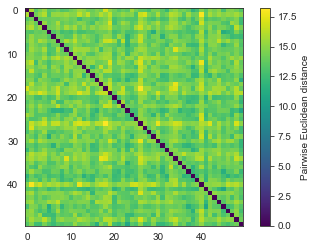

In [163]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

# generate some random data from a standard normal distribution
X = np.random.normal(loc=0, scale=1.0, size=(50,100)) # 50 points in 100D space

# this will get us a flattened vector of pairwise distances for all points 
X_dists_vec = pdist(X, 'euclidean')
# this will reshape the flattened vector to an nxn matrix of pairwise distances
X_dists_mat = squareform(X_dists_vec)

plt.imshow(X_dists_mat, cmap='viridis')
plt.colorbar(label='Pairwise Euclidean distance')
plt.show()

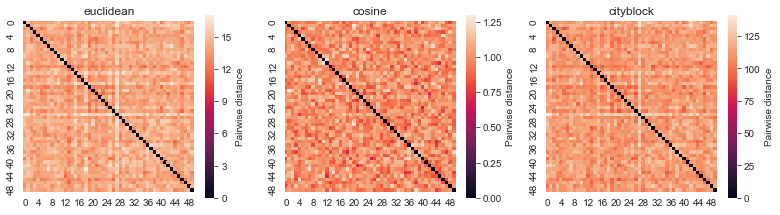

In [87]:
# let's try a few different distance metrics
dist_mets = ['euclidean', 'cosine', 'cityblock']
fig, axs = plt.subplots(1, len(dist_mets), figsize=(11,3))
for ii, dist_met in enumerate(dist_mets):
    X_dists = squareform(pdist(X, dist_met))
    sns.heatmap(X_dists, ax=axs[ii], square=True, cbar_kws={'label': 'Pairwise distance'})
    axs[ii].set_title(f'{dist_met}')
plt.tight_layout()
plt.show()

### computing correlations

In [88]:
import scipy.special
from scipy.stats import pearsonr, spearmanr

# generate some random data
x1 = np.random.normal(0, 1.0, [100])
x2 = np.random.normal(0, 1.0, [100])

# the most common correlation is the Pearson correlation
r, p = pearsonr(x1, x2)

print(f'Pearson correlation:\n r = {r:.04f} \n p= {p:.04f}')

Pearson correlation:
 r = 0.0729 
 p= 0.4711


In [89]:
# we can also use the very common Spearman rank correlation
r, p = spearmanr(x1, x2)
print(f'Spearman correlation:\n r = {r:.04f} \n p= {p:.04f}')

Spearman correlation:
 r = 0.0226 
 p= 0.8237


### performing t-tests 

A t-test allows you to determine whether two sets of measurements likely arose from distributions with different means. These measurements might be independent sets of measurements (i.e, two groups), or related sets of measurements (i.e. one group performing two tasks) 

In [90]:
# for independent data, e.g. two groups of subjects performing the same task 
t, p = scipy.stats.ttest_ind(x1, x2)
# for repeated measurements of the same system, e.g. one subject performs a task with/without a manipulation
t, p = scipy.stats.ttest_rel(x1, x2)

### Z-scoring to ensure different variables are on a common scale

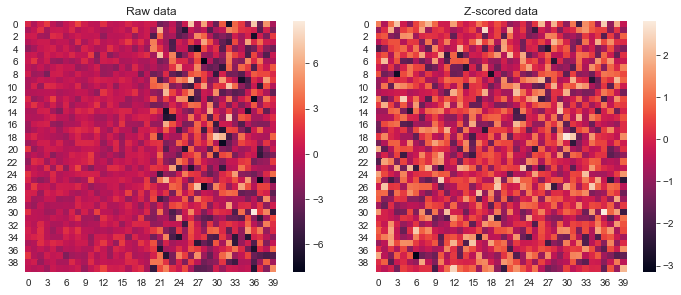

In [91]:
X = np.hstack((np.random.normal(0, 1.0, [40, 20]), np.random.normal(0, 3.0, [40,20])))
X_z = scipy.stats.zscore(X, ) # Z-scores columns 
fig, axs = plt.subplots(1, 2, figsize=(10,4))
g = sns.heatmap(X, ax=axs[0], square=True)
g.set_title('Raw data')
g = sns.heatmap(X_z, ax=axs[1], square=True)
g.set_title('Z-scored data')
plt.tight_layout()
plt.show()

Remember, if there is anything else you need to do in Python, first google "<that thing> in Python". Don't reinvent the wheel, build a car! 

## Machine learning with scikit-learn 

Scikit-learn is the de facto machine learning toolbox for Python (not including deep learning). It also has a fantastic API for exploring what is possible:
- https://scikit-learn.org/stable/modules/classes.html

Some things you can do:
- Linear and nonlinear dimensionality reduction, regression, and classification
- Clustering
- Fancy types of cross-validation
- feature selection 
- compute lots of different metrics of model performance
- implementing new machine learning algorithms using a common object-oriented interface 
- develop sophisticated and clean pipelines for a reproducible machine learning / data analysis workflow 

We will cover scikit-learn in a future exercise. Feel free to check it out on your own time, too. 

## Deep learning with pytorch

Most deep learning research in 2020 is done in Python using either PyTorch or Tensorflow. Most researchers (definitely at CMU) prefer PyTorch due to its more intuitive native interface (but see Keras for Tensorflow), more flexible dynamic graphs, and resultingly easier debugging experience. Industry tends to prefer Tensorflow since the static graphs run faster under certain circumstances. Both are highly capable. 

Pytorch is capable of:
- accelerating parallel computation by using a graphics processing card, with a very similar interface to numpy 
- training deep convolutional neural networks for computer vision tasks
- training recurrent neural networks for natural language processing and other dynamic tasks
- implementing state-of-the-art machine learning code, since so many researchers release their code publicly in PyTorch, and new important contributions are quickly incorporated into the pytorch API

We will cover pytorch in a future exercise. Feel free to check it out on your own time, too. 

# A good code organization for projects

Projects can easily get disorganized if you do not begin with a well-thought-out organization scheme. Taking the time up front to be organized will save you time later when you inevitably have to refactor your project to make it more readable for others, either those who might start working on the project with you, or others interacting with your code in order to e.g. reproduce the results of your paper.

We like the organization provided here: https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510 , and provide a short summary below

Python code is meant to be organized hierarchically in modules. This will get you pretty far in code organization. Here is a totally made up example of some code that you might organize during this bootcamp. Don't read too much into it, as most of the assignments you will be working on will be simple enough to complete in 1-2 files, and so they won't need a fancy organization. We are trying to help you think ahead to your research. 

If we are in the project directory, the file-tree might look something like this:

```
README.md
upnc/
upnc/__init__.py
upnc/ephys/
upnc/ephys/__init__.py
upnc/ephys/loading.py
upnc/ephys/temporal_processing.py
upnc/behavior/parse_eyelink.py
upnc/behavior/parse_behavior.py
upnc/behavior/__init__.py
data/
data/raw/
data/processed/
data/processed/smith_exp_spikes.mat
scripts/analyze_smith_data.py
scripts/plot_smith_data.py
notebooks/plot_smith_data.ipynb
```
The main themes are: a `README.md` file which explains the code base (markdown renders nicely automatically on GitHub, try this out), a module `upnc` containing sub-modules `ephys` and `behavior`, and a `scripts` directory containing analysis scripts that call functions organized neatly in the modules. Separating scripts and functions generally makes for a more organized code experience. Finally, you might also want to separate `notebooks` and `scripts`, where `notebooks` are more exploratory and focused on plotting, and scripts are more for crunching numbers and saving outputs to disk. 

Keep in mind, if you want to import your code as, e.g., `import upnc`, or `from upnc.ephys import temporal_processing`, you will need to make sure the code is on the path in whatever folder you are in.

If scripts are run from the project directory (which is common), you can do:
```Python
import sys
sys.path.append('.')
import upnc
```
For scripts run from the scripts directory, along with notebooks (which default to run from their own directory), do:
```Python
import sys
sys.path.append('..')
import upnc
```